In [72]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [73]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [74]:
NUM_CLASSES = 23

# Dataset reading

In [75]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [76]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [78]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [80]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [81]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                6960      
                                                                 
 dropout_7 (Dropout)         (None, 80)                0         
                                                                 
 dense_12 (Dense)            (None, 100)               8100      
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 23)                1173      
                                                                 
Total params: 21283 (83.14 KB)
Trainable params: 21283

In [82]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [83]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [84]:
model.fit(
    X_train,
    y_train,
    epochs=100*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/2300
14/17 [=======================>......] - ETA: 0s - loss: 3.0009 - accuracy: 0.1127 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 1s 22ms/step - loss: 2.9766 - accuracy: 0.1178 - val_loss: 2.7578 - val_accuracy: 0.2331
Epoch 2/2300
13/17 [=====================>........] - ETA: 0s - loss: 2.6748 - accuracy: 0.1923
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 9ms/step - loss: 2.6514 - accuracy: 0.1964 - val_loss: 2.4550 - val_accuracy: 0.2387


C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/2300
16/17 [===========================>..] - ETA: 0s - loss: 2.3811 - accuracy: 0.2480
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 2.3771 - accuracy: 0.2482 - val_loss: 2.0550 - val_accuracy: 0.3460
Epoch 4/2300
16/17 [===========================>..] - ETA: 0s - loss: 2.0688 - accuracy: 0.3135
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 2.0633 - accuracy: 0.3142 - val_loss: 1.7165 - val_accuracy: 0.4944
Epoch 5/2300
14/17 [=======================>......] - ETA: 0s - loss: 1.7935 - accuracy: 0.3856
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 1.7679 - accuracy: 0.3943 - val_loss: 1.4177 - val_accuracy: 0.5607
Epoch 6/2300
14/17 [=======================>......] - ETA: 0s - loss: 1.5446 - accuracy: 0.4425
E

16/17 [===========================>..] - ETA: 0s - loss: 0.2862 - accuracy: 0.8818
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.2848 - accuracy: 0.8818 - val_loss: 0.1919 - val_accuracy: 0.9223
Epoch 31/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.2746 - accuracy: 0.8880
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.2732 - accuracy: 0.8893 - val_loss: 0.1985 - val_accuracy: 0.9138
Epoch 32/2300
 1/17 [>.............................] - ETA: 0s - loss: 0.2835 - accuracy: 0.9141
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 6ms/step - loss: 0.2673 - accuracy: 0.8898 - val_loss: 0.1905 - val_accuracy: 0.9167
Epoch 33/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.2521 - accuracy: 0.8936
Epoch 33

17/17 [==============================] - ETA: 0s - loss: 0.1701 - accuracy: 0.9270
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 0.1701 - accuracy: 0.9270 - val_loss: 0.1257 - val_accuracy: 0.9732
Epoch 58/2300
17/17 [==============================] - ETA: 0s - loss: 0.1628 - accuracy: 0.9336
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.1628 - accuracy: 0.9336 - val_loss: 0.1206 - val_accuracy: 0.9689
Epoch 59/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.1584 - accuracy: 0.9282
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.1581 - accuracy: 0.9284 - val_loss: 0.1304 - val_accuracy: 0.9421
Epoch 60/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.1497 - accuracy: 0.9316
Epoch 60

 1/17 [>.............................] - ETA: 0s - loss: 0.1188 - accuracy: 0.9531
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 0.1018 - accuracy: 0.9543 - val_loss: 0.0895 - val_accuracy: 0.9774
Epoch 85/2300
 1/17 [>.............................] - ETA: 0s - loss: 0.0918 - accuracy: 0.9688
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.0961 - accuracy: 0.9689 - val_loss: 0.0818 - val_accuracy: 0.9859
Epoch 86/2300
 1/17 [>.............................] - ETA: 0s - loss: 0.0978 - accuracy: 0.9688
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 0.0979 - accuracy: 0.9628 - val_loss: 0.0813 - val_accuracy: 0.9887
Epoch 87/2300
 1/17 [>.............................] - ETA: 0s - loss: 0.0857 - accuracy: 0.9766
Epoch 87

16/17 [===========================>..] - ETA: 0s - loss: 0.0421 - accuracy: 0.9878
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.0562 - val_accuracy: 0.9972
Epoch 112/2300
17/17 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9826
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.0518 - accuracy: 0.9826 - val_loss: 0.0586 - val_accuracy: 0.9929
Epoch 113/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.0426 - accuracy: 0.9854
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 9ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0547 - val_accuracy: 0.9929
Epoch 114/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.0498 - accuracy: 0.9833
Ep

Epoch 138/2300
15/17 [=========================>....] - ETA: 0s - loss: 0.0305 - accuracy: 0.9911
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0511 - val_accuracy: 0.9972
Epoch 139/2300
16/17 [===========================>..] - ETA: 0s - loss: 0.0299 - accuracy: 0.9912
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.0292 - accuracy: 0.9915 - val_loss: 0.0530 - val_accuracy: 0.9972
Epoch 140/2300
17/17 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9934
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.0261 - accuracy: 0.9934 - val_loss: 0.0562 - val_accuracy: 0.9944
Epoch 141/2300
 1/17 [>.............................] - ETA: 0s - loss: 0.0196 - accu

In [85]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9972


In [86]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [87]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 72ms/step
[2.22391092e-14 6.42439019e-11 4.59726863e-07 5.57284839e-05
 1.64392409e-14 5.03793227e-17 1.61554084e-07 1.33490285e-11
 5.07827238e-08 3.73523676e-07 1.06453043e-16 8.22018217e-11
 1.07391966e-16 4.70521955e-10 1.57829056e-12 1.66239039e-12
 9.99942780e-01 7.25938007e-18 6.28810494e-14 1.94306597e-14
 5.10304915e-07 1.35477262e-17 8.15260748e-10]
16


# Confusion matrix

23/23 [==============================] - 0s 1ms/step


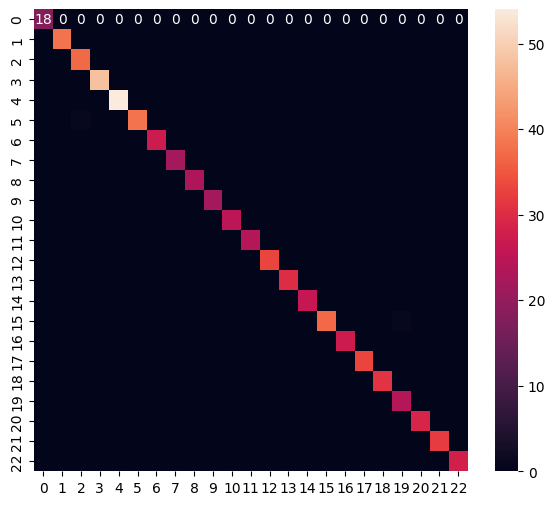

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        38
           2       0.97      1.00      0.99        37
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        54
           5       1.00      0.97      0.99        39
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        26
          15       1.00      0.97      0.99        38
          16       1.00      1.00      1.00        27
     

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [89]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpfkqrxouu\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpfkqrxouu\assets


24832

# Inference test

In [91]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [92]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [93]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [94]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [95]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.3823142e-14 5.4811895e-11 4.9447635e-07 5.6223624e-05 1.4333547e-14
 4.9581586e-17 1.7031719e-07 1.4767342e-11 5.0495441e-08 3.8958893e-07
 1.2930534e-16 8.7858214e-11 9.6974248e-17 4.8151527e-10 1.8224166e-12
 1.8024186e-12 9.9994218e-01 6.6493402e-18 6.6727304e-14 1.9347920e-14
 4.8478660e-07 1.4328469e-17 8.7387952e-10]
16
